In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

PHISHING DETECTION MODEL - PAGE CONTENT ANALYSIS ONLY

Dataset shape: (235795, 56)
Target distribution:
label
1    134850
0    100945
Name: count, dtype: int64

PAGE CONTENT FEATURES SELECTED

Total page content features: 18

📊 Feature Categories:
----------------------------------------------------------------------

📄 HTML/Code Structure (2 features):
  • LineOfCode                     (μ=1141.900, σ=3419.951)
  • LargestLineLength              (μ=12789.533, σ=152201.099)

🏷️ Page Elements (4 features):
  • HasTitle                       (μ=0.861, σ=0.346)
  • HasDescription                 (μ=0.440, σ=0.496)
  • HasCopyrightInfo               (μ=0.487, σ=0.500)
  • HasSocialNet                   (μ=0.457, σ=0.498)

🖼️ Media & Resources (3 features):
  • NoOfImage                      (μ=26.076, σ=79.412)
  • NoOfCSS                        (μ=6.333, σ=74.866)
  • NoOfJS                         (μ=10.522, σ=22.312)

📝 Form Analysis (4 features):
  • HasExternalFormSubmit          (μ=0

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


✓ AUC: 0.9999

⏳ Training Model 2/5... 

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


✓ AUC: 0.9999

⏳ Training Model 3/5... 

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


✓ AUC: 0.9999

⏳ Training Model 4/5... 

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


✓ AUC: 0.9999

⏳ Training Model 5/5... 

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


✓ AUC: 0.9999

📊 Mean AUC: 0.9999 (±0.0000)

📈 ENSEMBLE MODEL EVALUATION (PAGE CONTENT ONLY)

🎯 Overall Metrics:
  Accuracy:  0.9976 (99.76%)
  AUC-ROC:   0.9999

📋 Classification Report:
                precision    recall  f1-score   support

  Phishing (0)       1.00      1.00      1.00     20189
Legitimate (1)       1.00      1.00      1.00     26970

      accuracy                           1.00     47159
     macro avg       1.00      1.00      1.00     47159
  weighted avg       1.00      1.00      1.00     47159

🔢 Confusion Matrix:
                Predicted
              Phish   Legit
Actual Phish   20120      69
       Legit      45   26925

🔍 PAGE CONTENT FEATURE IMPORTANCE ANALYSIS

⭐ TOP 15 MOST IMPORTANT PAGE CONTENT FEATURES:
 1. NoOfExternalRef                │██████████████████████████                        │ 0.5243
 2. LineOfCode                     │████████                                          │ 0.1679
 3. NoOfSelfRef                    │█████                  

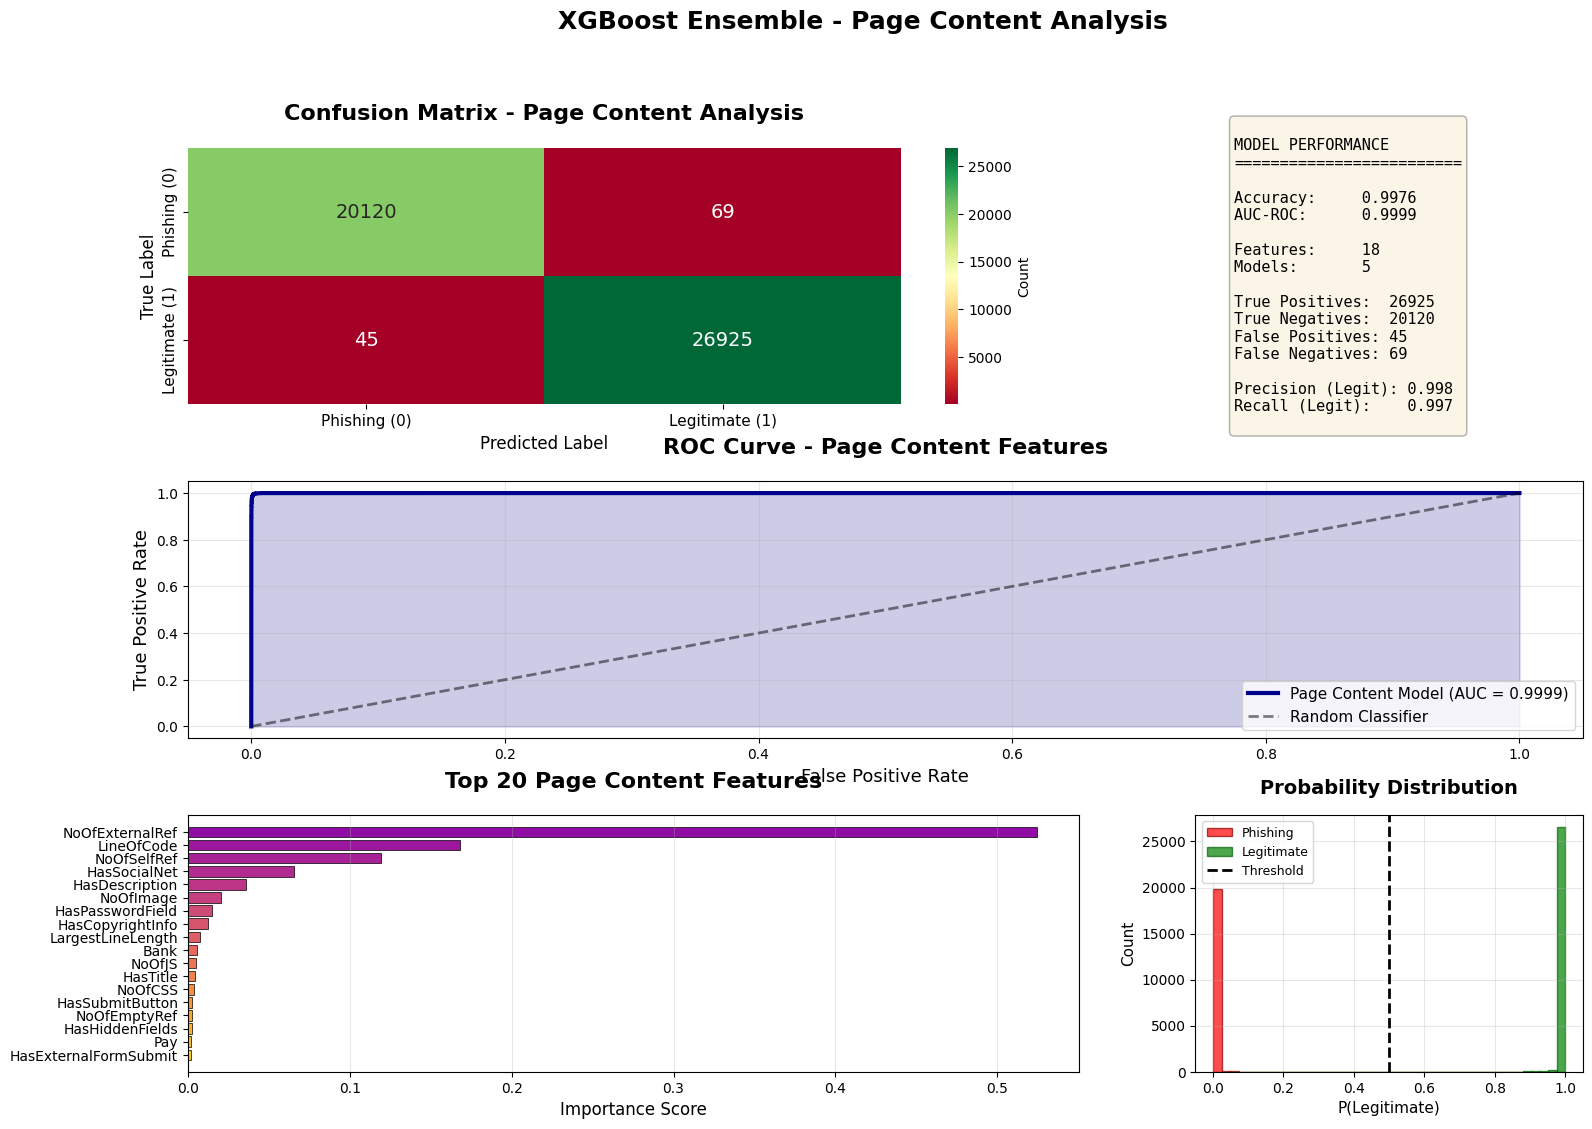


🎯 SAMPLE PREDICTIONS

✅ Sample 1:
  True:       Legitimate  
  Predicted:  Legitimate   (99.9% confidence)
  P(Legit):   0.9995  |  P(Malicious): 0.0005

✅ Sample 2:
  True:       Phishing    
  Predicted:  Phishing     (100.0% confidence)
  P(Legit):   0.0000  |  P(Malicious): 1.0000

✅ Sample 3:
  True:       Legitimate  
  Predicted:  Legitimate   (100.0% confidence)
  P(Legit):   0.9999  |  P(Malicious): 0.0001

✅ Sample 4:
  True:       Legitimate  
  Predicted:  Legitimate   (100.0% confidence)
  P(Legit):   1.0000  |  P(Malicious): 0.0000

✅ Sample 5:
  True:       Phishing    
  Predicted:  Phishing     (100.0% confidence)
  P(Legit):   0.0000  |  P(Malicious): 1.0000

✅ Sample 6:
  True:       Legitimate  
  Predicted:  Legitimate   (100.0% confidence)
  P(Legit):   0.9999  |  P(Malicious): 0.0001

✅ Sample 7:
  True:       Legitimate  
  Predicted:  Legitimate   (100.0% confidence)
  P(Legit):   1.0000  |  P(Malicious): 0.0000

✅ Sample 8:
  True:       Phishing    
  Predic

In [4]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load the dataset
df = pd.read_csv('/kaggle/input/phishing-url-websites-dataset-phiusiil/PhiUSIIL_Phishing_URL_Dataset.csv')

print("="*70)
print("PHISHING DETECTION MODEL - PAGE CONTENT ANALYSIS ONLY")
print("="*70)
print(f"\nDataset shape: {df.shape}")
print(f"Target distribution:\n{df['label'].value_counts()}")

# Define PAGE CONTENT ONLY features
page_content_features = [
    # HTML/Code Structure
    'LineOfCode',
    'LargestLineLength',
    
    # Page Elements
    'HasTitle',
    'HasDescription',
    'HasCopyrightInfo',
    'HasSocialNet',
    
    # Media & Resources
    'NoOfImage',
    'NoOfCSS',
    'NoOfJS',
    
    # Forms
    'HasExternalFormSubmit',
    'HasSubmitButton',
    'HasHiddenFields',
    'HasPasswordField',
    'InsecureForms',
    'RelativeFormAction',
    'ExtFormAction',
    'AbnormalFormAction',
    
    # Links & References
    'NoOfSelfRef',
    'NoOfEmptyRef',
    'NoOfExternalRef',
    'PctExtHyperlinks',
    'PctExtResourceUrls',
    'ExtFavicon',
    
    # Behavioral Features
    'FakeLinkInStatusBar',
    'RightClickDisabled',
    'PopUpWindow',
    'IframeRedirection',
    
    # Sensitive Keywords in Content
    'Bank',
    'Pay'
]

# Filter only available features
available_features = [f for f in page_content_features if f in df.columns]

print("\n" + "="*70)
print("PAGE CONTENT FEATURES SELECTED")
print("="*70)
print(f"\nTotal page content features: {len(available_features)}")

# Organize by subcategory
content_categories = {
    '📄 HTML/Code Structure': ['LineOfCode', 'LargestLineLength'],
    
    '🏷️ Page Elements': ['HasTitle', 'HasDescription', 'HasCopyrightInfo', 'HasSocialNet'],
    
    '🖼️ Media & Resources': ['NoOfImage', 'NoOfCSS', 'NoOfJS'],
    
    '📝 Form Analysis': [
        'HasExternalFormSubmit', 'HasSubmitButton', 'HasHiddenFields',
        'HasPasswordField', 'InsecureForms', 'RelativeFormAction',
        'ExtFormAction', 'AbnormalFormAction'
    ],
    
    '🔗 Links & References': [
        'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef',
        'PctExtHyperlinks', 'PctExtResourceUrls', 'ExtFavicon'
    ],
    
    '⚠️ Behavioral Indicators': [
        'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow', 'IframeRedirection'
    ],
    
    '💰 Sensitive Keywords': ['Bank', 'Pay']
}

print("\n📊 Feature Categories:")
print("-" * 70)
for category, features in content_categories.items():
    available_in_category = [f for f in features if f in available_features]
    if available_in_category:
        print(f"\n{category} ({len(available_in_category)} features):")
        for feature in available_in_category:
            # Get some statistics
            feature_mean = df[feature].mean()
            feature_std = df[feature].std()
            print(f"  • {feature:30s} (μ={feature_mean:.3f}, σ={feature_std:.3f})")

# Separate features and target
X = df[available_features]
y = df['label']

print("\n" + "="*70)
print(f"🎯 TRAINING MODEL WITH {X.shape[1]} PAGE CONTENT FEATURES")
print("="*70)

# Check for missing values
if X.isnull().sum().sum() > 0:
    print("\n⚠️ Missing values detected. Filling with median...")
    X = X.fillna(X.median())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📦 Data Split:")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Test set:     {X_test.shape[0]} samples")
print(f"  Train ratio:  {len(y_train[y_train==0])/len(y_train)*100:.1f}% phishing, {len(y_train[y_train==1])/len(y_train)*100:.1f}% legitimate")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost Ensemble
n_models = 5
models = []
cv_scores = []

print("\n" + "="*70)
print("🚀 TRAINING XGBOOST ENSEMBLE")
print("="*70)

for i in range(n_models):
    print(f"\n⏳ Training Model {i+1}/{n_models}...", end=" ")
    
    model = XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42+i,
        eval_metric='logloss',
        use_label_encoder=False
    )
    
    model.fit(
        X_train_scaled, y_train,
        eval_set=[(X_test_scaled, y_test)],
        early_stopping_rounds=20,
        verbose=False
    )
    
    models.append(model)
    
    # Get predictions on test set
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    cv_scores.append(auc_score)
    print(f"✓ AUC: {auc_score:.4f}")

print(f"\n📊 Mean AUC: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

# Ensemble predictions
ensemble_proba = np.zeros(len(X_test_scaled))
for model in models:
    ensemble_proba += model.predict_proba(X_test_scaled)[:, 1]
ensemble_proba /= n_models

ensemble_pred = (ensemble_proba >= 0.5).astype(int)

# Evaluation
print("\n" + "="*70)
print("📈 ENSEMBLE MODEL EVALUATION (PAGE CONTENT ONLY)")
print("="*70)

accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_auc = roc_auc_score(y_test, ensemble_proba)

print(f"\n🎯 Overall Metrics:")
print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  AUC-ROC:   {ensemble_auc:.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, ensemble_pred, 
                          target_names=['Phishing (0)', 'Legitimate (1)']))

cm = confusion_matrix(y_test, ensemble_pred)
print("🔢 Confusion Matrix:")
print(f"                Predicted")
print(f"              Phish   Legit")
print(f"Actual Phish   {cm[0][0]:5d}   {cm[0][1]:5d}")
print(f"       Legit   {cm[1][0]:5d}   {cm[1][1]:5d}")

# Feature Importance Analysis
print("\n" + "="*70)
print("🔍 PAGE CONTENT FEATURE IMPORTANCE ANALYSIS")
print("="*70)

# Average importance across all models
avg_importance = np.zeros(len(available_features))
for model in models:
    avg_importance += model.feature_importances_
avg_importance /= n_models

feature_importance = pd.DataFrame({
    'feature': available_features,
    'importance': avg_importance
}).sort_values('importance', ascending=False)

print("\n⭐ TOP 15 MOST IMPORTANT PAGE CONTENT FEATURES:")
print("="*70)
for idx, (_, row) in enumerate(feature_importance.head(15).iterrows(), 1):
    bar_length = int(row['importance'] * 50)
    bar = '█' * bar_length
    print(f"{idx:2d}. {row['feature']:30s} │{bar:50s}│ {row['importance']:.4f}")

# Feature importance by category
print("\n" + "="*70)
print("📊 FEATURE IMPORTANCE BY CATEGORY")
print("="*70)

for category, features in content_categories.items():
    category_features = feature_importance[feature_importance['feature'].isin(features)]
    if not category_features.empty:
        avg_importance_category = category_features['importance'].mean()
        print(f"\n{category}")
        print(f"  Average Importance: {avg_importance_category:.4f}")
        print(f"  Top features:")
        for _, row in category_features.head(3).iterrows():
            print(f"    • {row['feature']:30s} → {row['importance']:.4f}")

# Visualization
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Confusion Matrix (larger)
ax1 = fig.add_subplot(gs[0, :2])
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn', ax=ax1, 
            cbar_kws={'label': 'Count'}, annot_kws={'size': 14})
ax1.set_title('Confusion Matrix - Page Content Analysis', fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('True Label', fontsize=12)
ax1.set_xlabel('Predicted Label', fontsize=12)
ax1.set_xticklabels(['Phishing (0)', 'Legitimate (1)'], fontsize=11)
ax1.set_yticklabels(['Phishing (0)', 'Legitimate (1)'], fontsize=11)

# 2. Model Performance Summary
ax2 = fig.add_subplot(gs[0, 2])
ax2.axis('off')
summary_text = f"""
MODEL PERFORMANCE
{'='*25}

Accuracy:     {accuracy:.4f}
AUC-ROC:      {ensemble_auc:.4f}

Features:     {len(available_features)}
Models:       {n_models}

True Positives:  {cm[1][1]}
True Negatives:  {cm[0][0]}
False Positives: {cm[1][0]}
False Negatives: {cm[0][1]}

Precision (Legit): {cm[1][1]/(cm[1][1]+cm[1][0]):.3f}
Recall (Legit):    {cm[1][1]/(cm[1][1]+cm[0][1]):.3f}
"""
ax2.text(0.1, 0.5, summary_text, fontsize=11, family='monospace', 
         verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

# 3. ROC Curve
ax3 = fig.add_subplot(gs[1, :])
fpr, tpr, _ = roc_curve(y_test, ensemble_proba)
ax3.plot(fpr, tpr, linewidth=3, label=f'Page Content Model (AUC = {ensemble_auc:.4f})', color='darkblue')
ax3.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier', alpha=0.5)
ax3.fill_between(fpr, tpr, alpha=0.2, color='darkblue')
ax3.set_xlabel('False Positive Rate', fontsize=13)
ax3.set_ylabel('True Positive Rate', fontsize=13)
ax3.set_title('ROC Curve - Page Content Features', fontsize=16, fontweight='bold', pad=20)
ax3.legend(loc='lower right', fontsize=11)
ax3.grid(alpha=0.3)

# 4. Feature Importance
ax4 = fig.add_subplot(gs[2, :2])
top_features = feature_importance.head(20)
colors = plt.cm.plasma(np.linspace(0.3, 0.9, len(top_features)))
ax4.barh(range(len(top_features)), top_features['importance'], color=colors, edgecolor='black', linewidth=0.5)
ax4.set_yticks(range(len(top_features)))
ax4.set_yticklabels(top_features['feature'], fontsize=10)
ax4.invert_yaxis()
ax4.set_xlabel('Importance Score', fontsize=12)
ax4.set_title('Top 20 Page Content Features', fontsize=16, fontweight='bold', pad=20)
ax4.grid(axis='x', alpha=0.3)

# 5. Probability Distribution
ax5 = fig.add_subplot(gs[2, 2])
ax5.hist(ensemble_proba[y_test == 0], bins=40, alpha=0.7, label='Phishing', color='red', edgecolor='darkred')
ax5.hist(ensemble_proba[y_test == 1], bins=40, alpha=0.7, label='Legitimate', color='green', edgecolor='darkgreen')
ax5.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Threshold')
ax5.set_xlabel('P(Legitimate)', fontsize=11)
ax5.set_ylabel('Count', fontsize=11)
ax5.set_title('Probability Distribution', fontsize=14, fontweight='bold', pad=15)
ax5.legend(fontsize=9)
ax5.grid(alpha=0.3)

plt.suptitle('XGBoost Ensemble - Page Content Analysis', fontsize=18, fontweight='bold', y=0.995)
plt.savefig('page_content_phishing_detection.png', dpi=300, bbox_inches='tight')
plt.show()

# Sample Predictions
print("\n" + "="*70)
print("🎯 SAMPLE PREDICTIONS")
print("="*70)

sample_indices = np.random.choice(len(X_test), 10, replace=False)
sample_features = X_test.iloc[sample_indices]
sample_labels = y_test.iloc[sample_indices]

sample_probas = ensemble_proba[sample_indices]

for idx, (prob, true_label) in enumerate(zip(sample_probas, sample_labels), 1):
    malicious_prob = 1 - prob
    true_class = "Legitimate" if true_label == 1 else "Phishing"
    pred_class = "Legitimate" if prob >= 0.5 else "Phishing"
    confidence = max(prob, malicious_prob) * 100
    
    status = "✅" if (pred_class == true_class) else "❌"
    
    print(f"\n{status} Sample {idx}:")
    print(f"  True:       {true_class:12s}")
    print(f"  Predicted:  {pred_class:12s} ({confidence:.1f}% confidence)")
    print(f"  P(Legit):   {prob:.4f}  |  P(Malicious): {malicious_prob:.4f}")

# Save model
model_data = {
    'models': models,
    'scaler': scaler,
    'feature_names': available_features,
    'feature_categories': content_categories,
    'n_models': n_models,
    'ensemble_auc': ensemble_auc,
    'accuracy': accuracy,
    'cv_scores': cv_scores,
    'feature_importance': feature_importance
}

with open('xgboost_page_content_phishing.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("\n" + "="*70)
print("💾 MODEL SAVED SUCCESSFULLY!")
print("="*70)
print(f"📁 File: xgboost_page_content_phishing.pkl")
print(f"\n📊 Model Summary:")
print(f"  • Features:        {len(available_features)} (page content only)")
print(f"  • Ensemble size:   {n_models} models")
print(f"  • AUC-ROC:         {ensemble_auc:.4f}")
print(f"  • Accuracy:        {accuracy:.4f}")
print(f"  • Training size:   {len(X_train)} samples")

print(f"\n🏆 Top 5 Features:")
for idx, (_, row) in enumerate(feature_importance.head(5).iterrows(), 1):
    print(f"  {idx}. {row['feature']:30s} ({row['importance']:.4f})")

print("\n" + "="*70)
print("📝 USAGE INSTRUCTIONS")
print("="*70)
 
# Load the saved model:
import pickle
import pandas as pd
import numpy as np

with open('xgboost_page_content_phishing.pkl', 'rb') as f:
    model_data = pickle.load(f)

models = model_data['models']
scaler = model_data['scaler']
feature_names = model_data['feature_names']

# Predict on new data:
def predict_phishing(page_content_features_df):
    # Ensure correct feature order
    page_content_features_df = page_content_features_df[feature_names]
    
    # Scale features
    scaled = scaler.transform(page_content_features_df)
    
    # Ensemble prediction
    proba = np.mean([m.predict_proba(scaled)[:, 1] for m in models], axis=0)
    
    return {
        'legitimate_probability': proba,
        'malicious_probability': 1 - proba,
        'prediction': ['Legitimate' if p >= 0.5 else 'Phishing' for p in proba]
    }

# Example:
# results = predict_phishing(new_page_features)
# print(results['prediction'])
# print(results['malicious_probability'])
 